# ASL Alphabet Recognition using MediaPipe Landmarks
Train a simple model on the ASL Alphabet dataset using MediaPipe hand landmarks instead of raw images.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/asl_alphabet_train.rar" "/content/"
!unrar x "/content/asl_alphabet_train.rar" "/content/asl_dataset/" -o+

Streaming output truncated to the last 5000 lines.
Extracting  /content/asl_dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1900.jpg      94%  OK 
Extracting  /content/asl_dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1901.jpg      94%  OK 
Extracting  /content/asl_dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1902.jpg      94%  OK 
Extracting  /content/asl_dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1903.jpg      94%  OK 
Extracting  /content/asl_dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1904.jpg      94%  OK 
Extracting  /content/asl_dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1905.jpg      94%  OK 
Extracting  /content/asl_dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1906.jpg      94%  OK 
Extracting  /content/asl_dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1907.jpg      94%  OK 
Extracting  /content/asl_dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1908.jpg      94% 

In [5]:
# Force install working versions
!pip install --upgrade --force-reinstall \
    numpy==1.23.5 \
    protobuf==3.20.* \
    opencv-python-headless==4.7.0.72 \
    mediapipe==0.10.9

# Restart runtime after this


  Using cached sounddevice-0.5.2-py3-none-any.whl.metadata (1.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.6 MB/s eta 0:00:00
Using cached sounddevice-0.5.2-py3-none-any.whl (32 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 29.0 MB/s eta 0:00:0

In [6]:
!pip install numpy==1.26.4 protobuf==4.25.7 mediapipe==0.10.21


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.7 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.7.0.72 which is incompatible.
albucore 0.0.24 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.7.0.72 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.

In [1]:
import numpy as np
print("NumPy version:", np.__version__)

import mediapipe as mp
print("MediaPipe imported successfully!")


NumPy version: 1.26.4
MediaPipe imported successfully!


In [2]:
import os
import cv2
import numpy as np
import mediapipe as mp
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models


In [3]:
# Mount Google Drive if your dataset is there
# from google.colab import drive
# drive.mount('/content/drive')

# Define dataset path (adjust this as needed)
DATA_DIR = "/content/asl_dataset/asl_alphabet_train/asl_alphabet_train"
CATEGORIES = sorted(os.listdir(DATA_DIR))
print("Classes:", CATEGORIES)


Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [4]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)
mp_drawing = mp.solutions.drawing_utils

data = []
labels = []

for label_index, category in enumerate(CATEGORIES):
    folder_path = os.path.join(DATA_DIR, category)
    for file in os.listdir(folder_path)[:300]:  # You can increase this number for more data
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        result = hands.process(img_rgb)
        if result.multi_hand_landmarks:
            hand_landmarks = result.multi_hand_landmarks[0]
            landmark_list = []
            for lm in hand_landmarks.landmark:
                landmark_list.extend([lm.x, lm.y, lm.z])
            data.append(landmark_list)
            labels.append(label_index)


In [6]:
import numpy as np

np.save("X_landmarks.npy", np.array(data))   # Save the landmarks
np.save("y_labels.npy", np.array(labels))    # Save the corresponding labels
print("Saved landmarks and labels to .npy files.")


Saved landmarks and labels to .npy files.


In [ ]:
X = np.load("X_landmarks.npy")
y = np.load("y_labels.npy")
print("Loaded saved landmark data.")


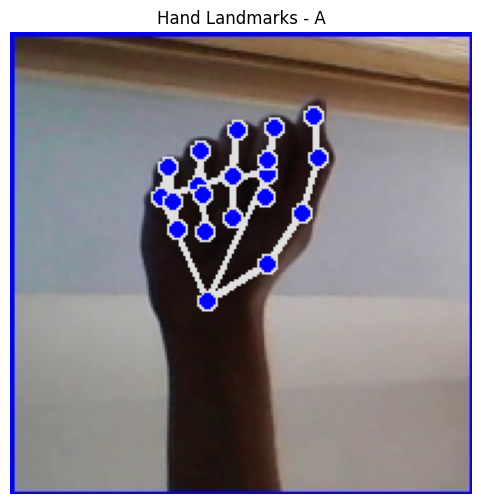

In [7]:
import matplotlib.pyplot as plt

sample_path = os.path.join(DATA_DIR, CATEGORIES[0], os.listdir(os.path.join(DATA_DIR, CATEGORIES[0]))[0])
image = cv2.imread(sample_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = hands.process(image_rgb)

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)

plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title(f"Hand Landmarks - {CATEGORIES[0]}")
plt.axis('off')
plt.show()


In [8]:
data = np.array(data)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train_cat = to_categorical(y_train, num_classes=len(CATEGORIES))
y_test_cat = to_categorical(y_test, num_classes=len(CATEGORIES))
print("Data shape:", X_train.shape)


Data shape: (5076, 63)


In [13]:
model = models.Sequential([
    layers.Input(shape=(63,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(CATEGORIES), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history= model.fit(X_train, y_train_cat, epochs=20, validation_data=(X_test, y_test_cat))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 29)             │         1,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,333 (71.61 KB)

 Trainable params: 18,333 (71.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.0818 - loss: 3.2715 - val_accuracy: 0.2530 - val_loss: 2.7473
Epoch 2/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2751 - loss: 2.5762 - val_accuracy: 0.6454 - val_loss: 1.8773
Epoch 3/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4760 - loss: 1.8524 - val_accuracy: 0.7400 - val_loss: 1.2713
Epoch 4/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6205 - loss: 1.3461 - val_accuracy: 0.7723 - val_loss: 0.9788
Epoch 5/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7054 - loss: 1.0530 - val_accuracy: 0.8227 - val_loss: 0.7727
Epoch 6/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7661 - loss: 0.8691 - val_accuracy: 0.8511 - val_loss: 0.6356
Epoch 7/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7880 - loss: 0.7476 - val_accuracy: 0.8771 - val_loss: 0.5586
Epoch 8/20
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8191 - loss: 0.6392 - val_accuracy: 0

In [14]:
model.save('/content/drive/MyDrive/asl_model_mediapipe.h5')
print("Model saved as asl_mediapipe_model.h5")


Model saved as asl_mediapipe_model.h5


In [34]:
import tensorflow as tf

# Load your saved Keras model
model = tf.keras.models.load_model('/content/drive/MyDrive/asl_model_mediapipe.h5')


In [35]:
# Create a TFLiteConverter object from the Keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# (Optional) You can enable optimizations here if needed:
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()


Saved artifact at '/tmp/tmpq66le2cu'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 63), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  139215139865616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139215139867344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139215139876176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139215139879824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139215139875792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139215139873680: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [36]:
# Save the TFLite model to your Drive
tflite_model_path = '/content/drive/MyDrive/asl_model_mediapipe.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved to {tflite_model_path}")


TFLite model saved to /content/drive/MyDrive/asl_model_mediapipe.tflite


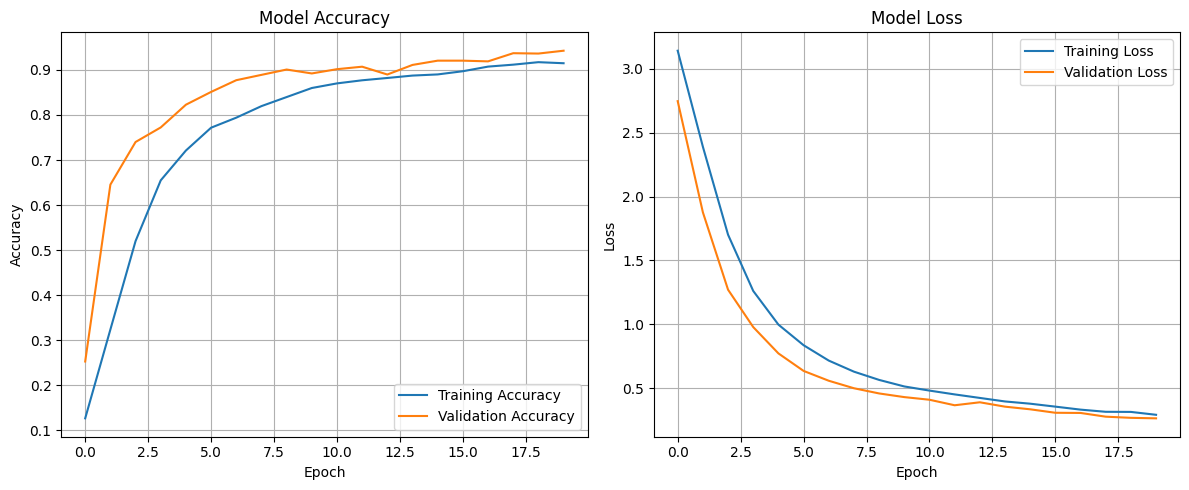

In [15]:
import matplotlib.pyplot as plt

# Assuming you stored the fit result in a variable called 'history'
# history = model.fit(...)

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [30]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize MediaPipe Hands with lower detection confidence for testing
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.3
)

In [31]:
def preprocess_image(image_path):
    """
    Given an image path, read the image, detect hand landmarks using MediaPipe,
    and return a flattened landmarks vector suitable for your model input.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found or unable to read.")

    # Resize for consistency (optional)
    img = cv2.resize(img, (640, 480))

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = hands.process(img_rgb)

    if not result.multi_hand_landmarks:
        print("Warning: No hand detected in the image.")
        return None

    hand_landmarks = result.multi_hand_landmarks[0]

    # Optional: Draw landmarks and show image to verify detection
    annotated_img = img_rgb.copy()
    mp_drawing.draw_landmarks(annotated_img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    plt.figure(figsize=(6, 6))
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.show()

    landmark_list = []
    for lm in hand_landmarks.landmark:
        landmark_list.extend([lm.x, lm.y, lm.z])

    # Convert to numpy array and reshape for model input
    return np.array(landmark_list).reshape(1, -1)


Saving G_test.jpg to G_test.jpg
Saving H_test.jpg to H_test (1).jpg
Saving M_test.jpg to M_test (1).jpg
Processing G_test.jpg...


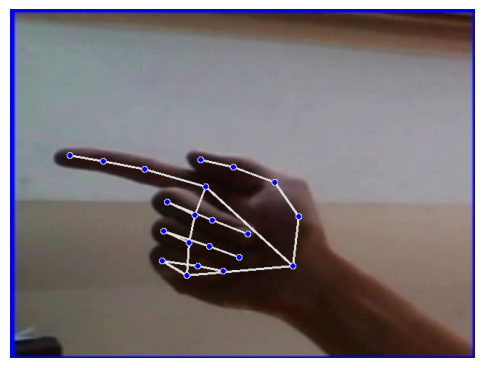

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class index: 6
Predicted label: G
Processing H_test (1).jpg...


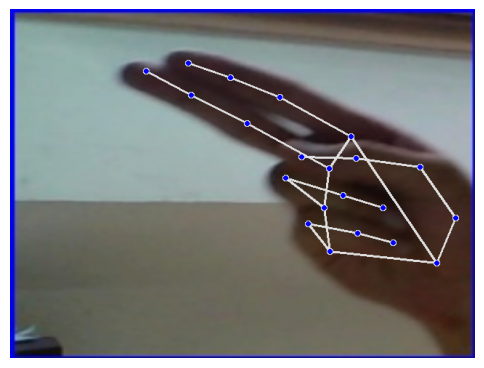

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class index: 7
Predicted label: H
Processing M_test (1).jpg...


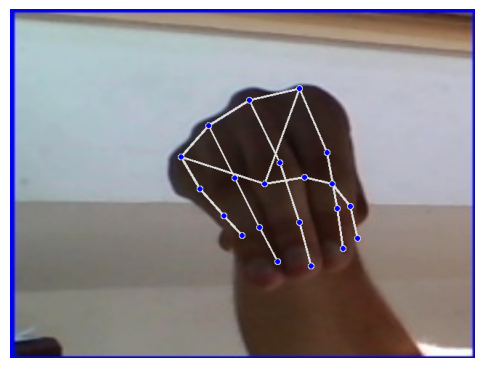

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class index: 12
Predicted label: M


In [33]:
from google.colab import files

# Upload an image file
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Processing {filename}...")
    landmarks_vector = preprocess_image(filename)

    if landmarks_vector is None:
        print("Please upload a clear hand gesture image with visible hand.")
        continue

    # Predict using your model
    prediction = model.predict(landmarks_vector)
    predicted_class = np.argmax(prediction)

    print(f"Predicted class index: {predicted_class}")
    print(f"Predicted label: {CATEGORIES[predicted_class]}")  # Ensure CATEGORIES list is loaded/defined
